In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

# ==DATASET==

File of 100 top crypto currancy stocks and their values

In [2]:
# Import dataframe
df = pd.read_csv('Top 100 Cryptocurrency 2022.csv')

In [3]:
# Clean data:Replace spaces with underscores
df['Crypto_Name'] = df['Crypto_Name'].str.replace(' ','_')

# Clean data: Remove special characters
def clean_Data(Column):
    x = df[Column]
    x = x.str.replace(' ','_')
    x = x.str.replace("$","")
    x = x.str.replace(",","")
    x = x.str.replace("%","")
    x = pd.to_numeric(x)
    df[Column] = x
clean_Data('Price')
clean_Data('Price_Yesterday')
clean_Data('Price_Last_Week')
clean_Data('Price_Last_Month')
clean_Data('Price_Last_Year')
clean_Data('Changes_24H')
clean_Data('Changes_7D')
clean_Data('Changes_30D')
clean_Data('Changes_1Y')
print(df)

    Ranking        Crypto_Name     Price  Changes_24H  Changes_7D  \
0         1            BITCOIN  36983.00        -2.97        1.96   
1         2    WRAPPED_BITCOIN  37019.00        -2.84        1.84   
2         3          HUOBI_BTC  36942.00        -4.24        1.37   
3         4           ETHEREUM   2510.00        -3.64       -1.28   
4         5  LIDO_STAKED_ETHER   2494.00        -3.23       -1.84   
..      ...                ...       ...          ...         ...   
95       96              ECOMI      0.01        -6.53        4.42   
96       97         BITTORRENT      0.01         0.01       -1.10   
97       98           SAFEMOON      0.01        -3.19       -3.72   
98       99              ECASH      0.01        -3.71       -1.41   
99      100          SHIBA_INU      0.01        -6.68       -8.16   

    Changes_30D  Changes_1Y Market_Cap Volume_24H Available_Supply  \
0        -20.08        8.25  $701.49 B   $13.01 B      18.94 M BTC   
1        -20.13        8.26   $

C:\Users\Thats\AppData\Local\Temp/ipykernel_11468/4229579958.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  x = x.str.replace("$","")


# ==DESCRTIPTIVE DATA==

(Doubble click on graphs to zoom)

Bar Chart || Shows changes percentage changes from previous day

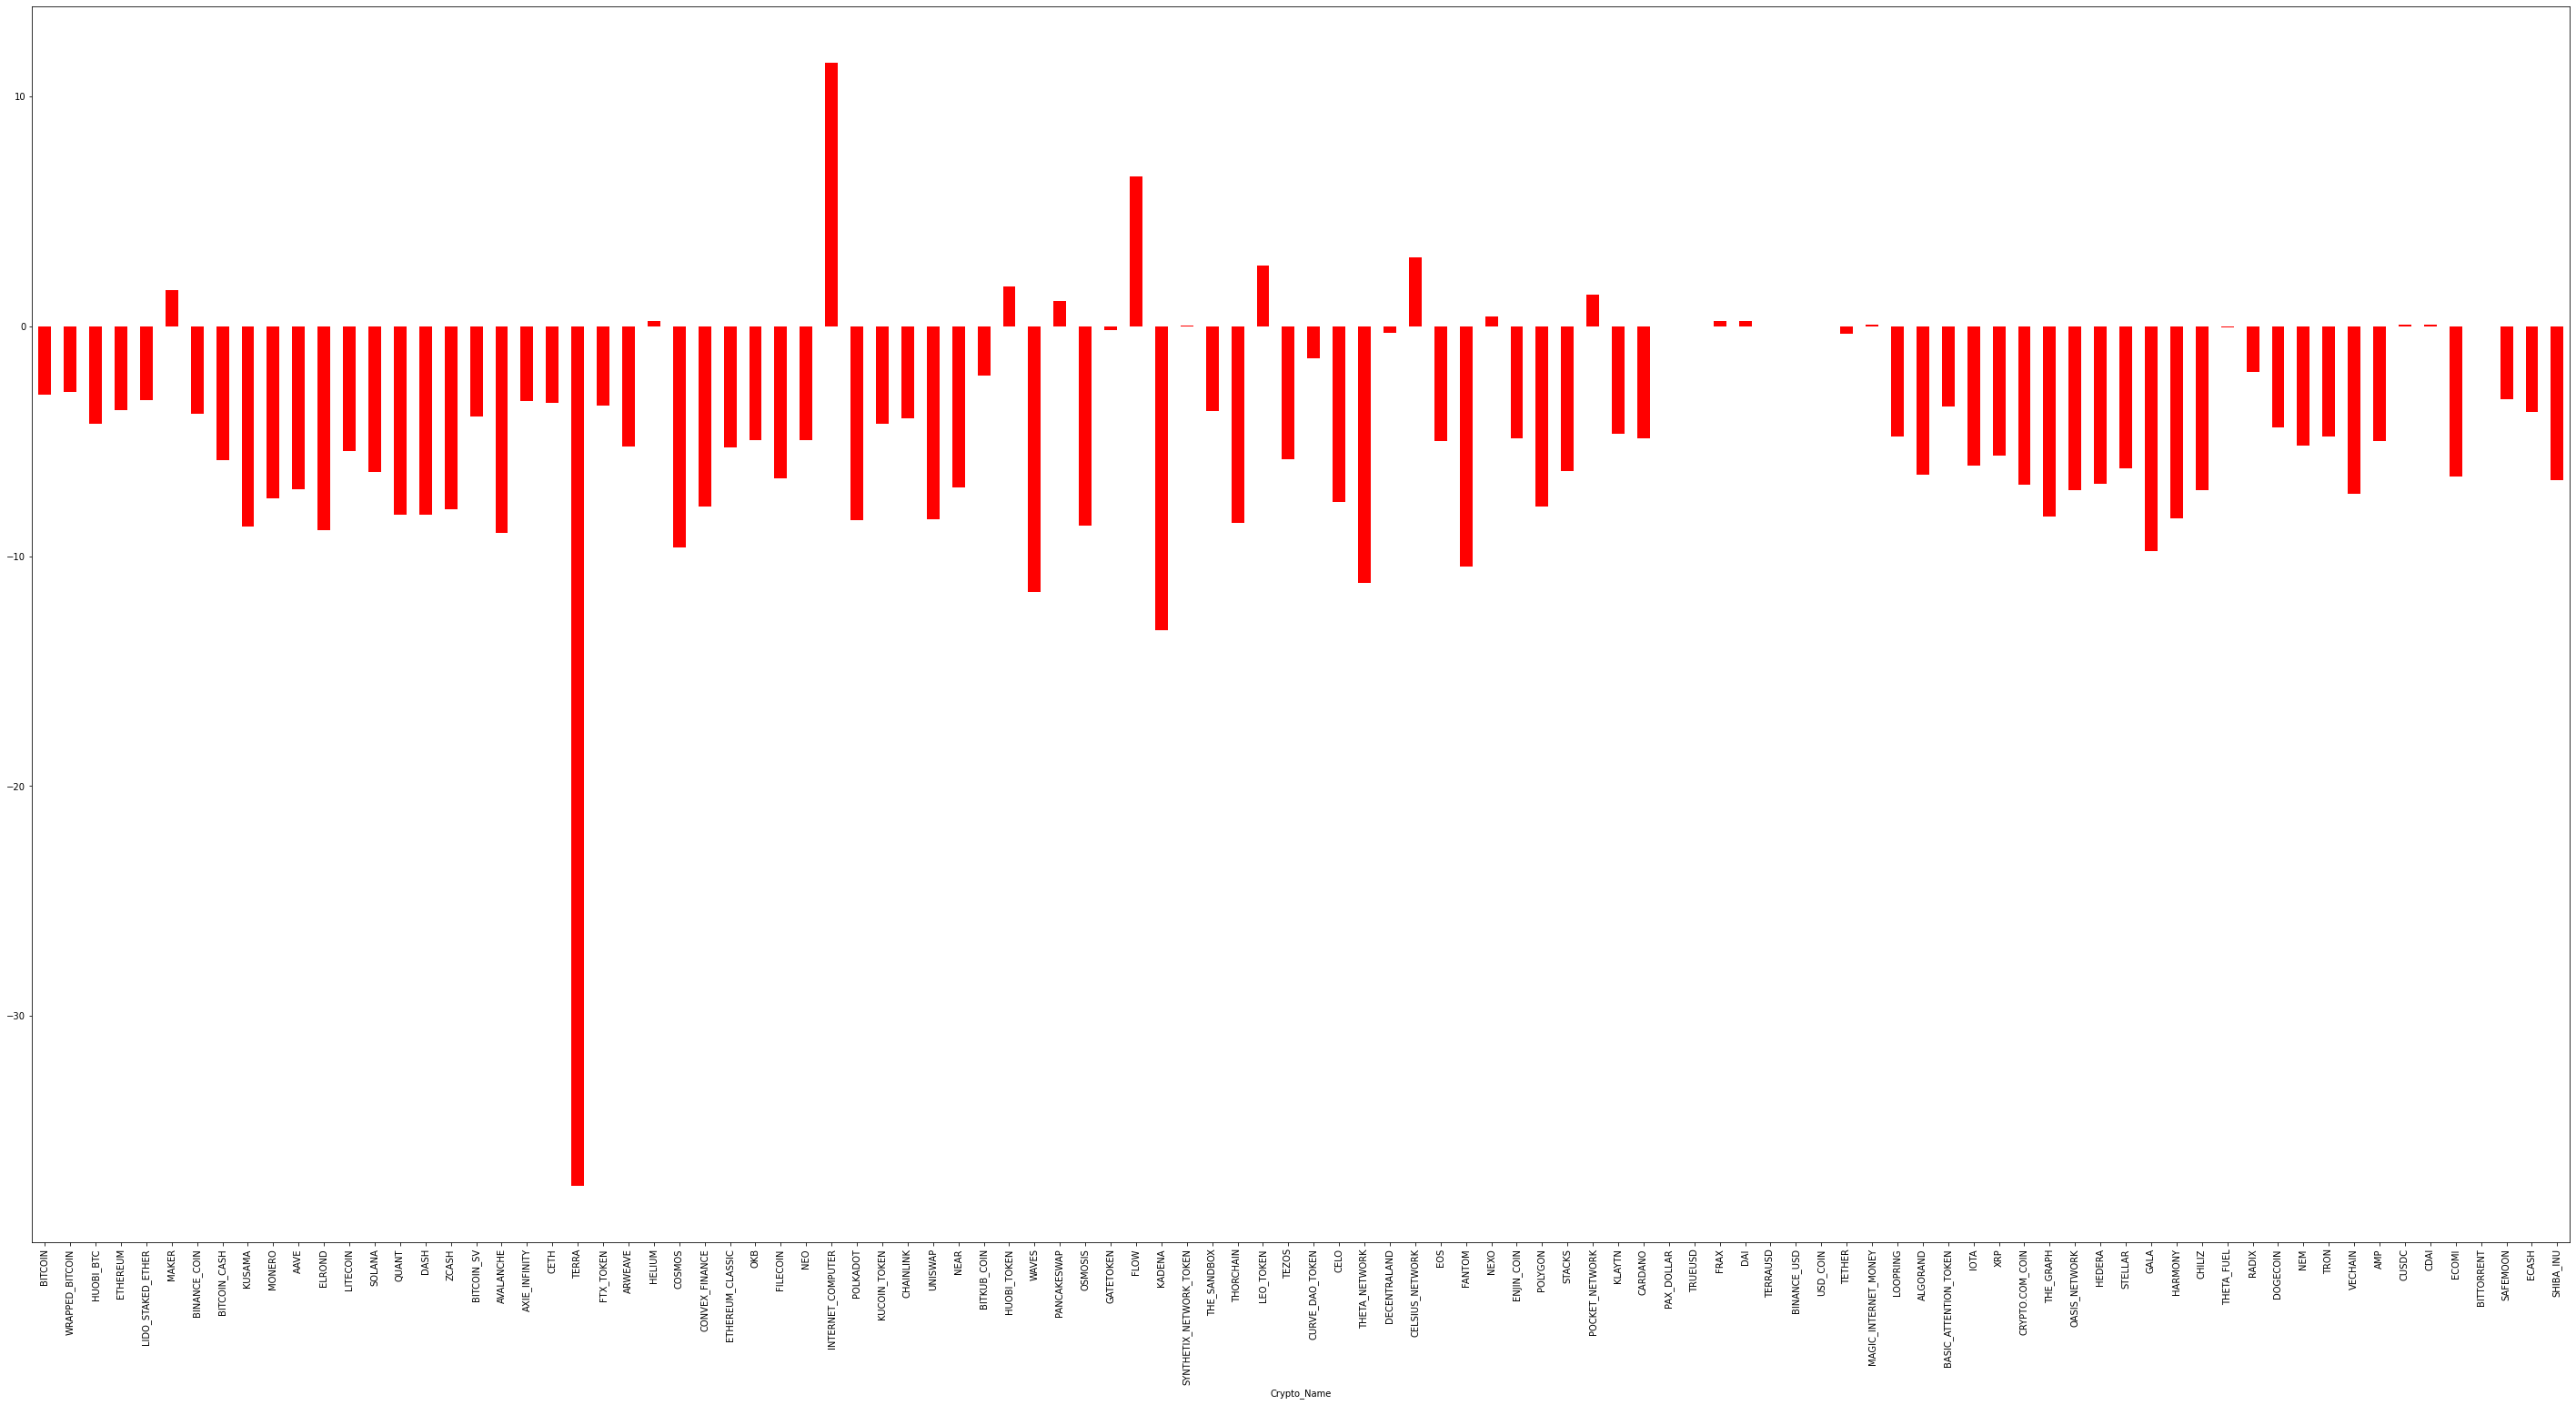

In [4]:
bar = df[['Changes_24H','Crypto_Name']]
bar.set_index('Crypto_Name').Changes_24H.astype(float).plot(
    kind = 'bar', 
    color='red', 
    figsize=(50,25));

Pie Chart || Shows market share of top 7 coins (coins less then that are too small to see)

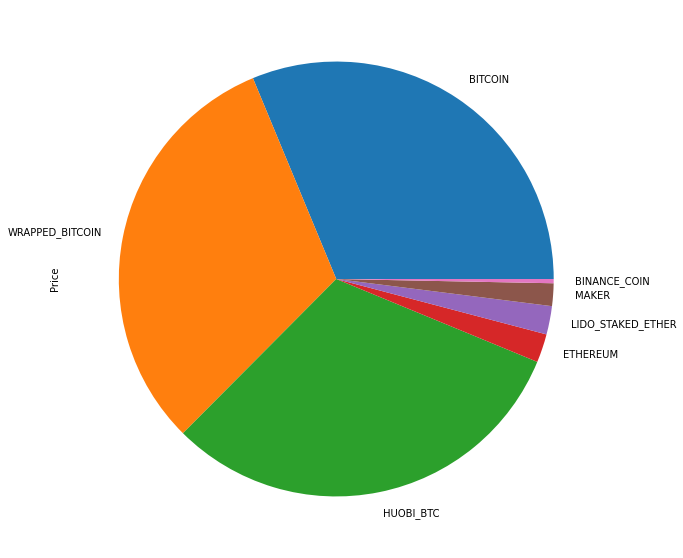

In [5]:
pie = df.Price.head(7).astype(float)
pie.plot(kind='pie',labels=df.Crypto_Name,figsize=(10,10));

# ==PERSCRITPIVE DATA==

In [6]:
#Dependent
y = df.Price

#Independent
X = df.loc[:, ['Price_Yesterday','Changes_24H','Changes_7D','Price_Last_Week','Changes_30D','Price_Last_Month']].values

reg = LinearRegression(fit_intercept=True)

#make train
X_train, X_test, y_train, y_test = train_test_split(X,y)

#fit to model
reg.fit(X_train,y_train)

#make test
reg.predict(X_test)

#Get predicitons of all stocks
prediction = reg.predict(X[0:100])

#Make in to a dataframe
prediction = pd.DataFrame(data=reg.predict(X[0:100]), columns=["Predicted_Price"])
predPrice = prediction["Predicted_Price"]
df = df.join(predPrice)

#Make accuracy 
df['Accuracy'] = abs(df['Predicted_Price'].astype(float) - df['Price'].astype(float))
df['Accuracy_%'] = abs(df['Predicted_Price'].astype(float) / df['Price'].astype(float))
score = reg.score(X_test,y_test)

print(f"accuracy score = {score}")

accuracy score = 0.9615889389315835


Bar chart: Shows the prediction compared to actual price.

In [7]:
bgf = df[["Crypto_Name","Predicted_Price", "Price"]].values
bgf = df.head(7)
bgf.plot(x="Crypto_Name", y=["Predicted_Price", "Price"], kind="barh",figsize=(9,8));

In [8]:
#Creates a  model for dependent variable on future stock
df['Price_Tomarrow'] = (df['Price'].astype(float)  + df['Price_Yesterday'].astype(float))/2

#Dependent
y = df.Price_Tomarrow

#Independent
X = df.loc[:, ['Price','Price_Yesterday','Changes_24H','Changes_7D','Price_Last_Week','Changes_30D','Price_Last_Month']].values

reg = LinearRegression(fit_intercept=True)

#make train
X_train, X_test, y_train, y_test = train_test_split(X,y)

#fit to model
reg.fit(X_train,y_train)

#make test
reg.predict(X_test)

#Get predicitons of all stocks
prediction = reg.predict(X[0:100])

#Make in to a dataframe
prediction = pd.DataFrame(data=reg.predict(X[0:100]), columns=["Predicted_Price"])
predPrice = prediction["Predicted_Price"]

#Make accuracy 
df['Accuracy'] = abs(df['Predicted_Price'].astype(float) - df['Price'].astype(float))
df['Accuracy_%'] = abs(df['Predicted_Price'].astype(float) / df['Price'].astype(float))
score = reg.score(X_test,y_test)

print(df)

    Ranking        Crypto_Name     Price  Changes_24H  Changes_7D  \
0         1            BITCOIN  36983.00        -2.97        1.96   
1         2    WRAPPED_BITCOIN  37019.00        -2.84        1.84   
2         3          HUOBI_BTC  36942.00        -4.24        1.37   
3         4           ETHEREUM   2510.00        -3.64       -1.28   
4         5  LIDO_STAKED_ETHER   2494.00        -3.23       -1.84   
..      ...                ...       ...          ...         ...   
95       96              ECOMI      0.01        -6.53        4.42   
96       97         BITTORRENT      0.01         0.01       -1.10   
97       98           SAFEMOON      0.01        -3.19       -3.72   
98       99              ECASH      0.01        -3.71       -1.41   
99      100          SHIBA_INU      0.01        -6.68       -8.16   

    Changes_30D  Changes_1Y Market_Cap Volume_24H Available_Supply  \
0        -20.08        8.25  $701.49 B   $13.01 B      18.94 M BTC   
1        -20.13        8.26   $

Change model to predict future

Line graph || Shows an individual stock price over time

In [9]:
stock = df
stock.set_index('Crypto_Name', inplace=True)

Index(['BITCOIN', 'WRAPPED_BITCOIN', 'HUOBI_BTC', 'ETHEREUM',
       'LIDO_STAKED_ETHER', 'MAKER', 'BINANCE_COIN', 'BITCOIN_CASH', 'KUSAMA',
       'MONERO', 'AAVE', 'ELROND', 'LITECOIN', 'SOLANA', 'QUANT', 'DASH',
       'ZCASH', 'BITCOIN_SV', 'AVALANCHE', 'AXIE_INFINITY', 'CETH', 'TERRA',
       'FTX_TOKEN', 'ARWEAVE', 'HELIUM', 'COSMOS', 'CONVEX_FINANCE',
       'ETHEREUM_CLASSIC', 'OKB', 'FILECOIN', 'NEO', 'INTERNET_COMPUTER',
       'POLKADOT', 'KUCOIN_TOKEN', 'CHAINLINK', 'UNISWAP', 'NEAR',
       'BITKUB_COIN', 'HUOBI_TOKEN', 'WAVES', 'PANCAKESWAP', 'OSMOSIS',
       'GATETOKEN', 'FLOW', 'KADENA', 'SYNTHETIX_NETWORK_TOKEN', 'THE_SANDBOX',
       'THORCHAIN', 'LEO_TOKEN', 'TEZOS', 'CURVE_DAO_TOKEN', 'CELO',
       'THETA_NETWORK', 'DECENTRALAND', 'CELSIUS_NETWORK', 'EOS', 'FANTOM',
       'NEXO', 'ENJIN_COIN', 'POLYGON', 'STACKS', 'POCKET_NETWORK', 'KLAYTN',
       'CARDANO', 'PAX_DOLLAR', 'TRUEUSD', 'FRAX', 'DAI', 'TERRAUSD',
       'BINANCE_USD', 'USD_COIN', 'TETHER', 'MAGIC_IN

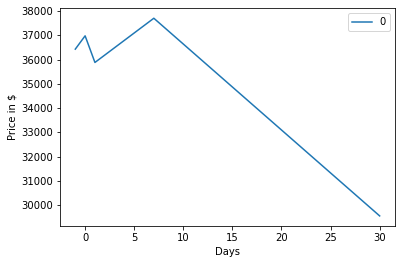

In [10]:
print(stock.index)
a = input("what stock would you like to see? (copy/paste between the ' ')")

stock = stock.loc[[a]]

#1 variable
data = np.array([stock.Price_Tomarrow,stock.Price,stock.Price_Yesterday,stock.Price_Last_Week,stock.Price_Last_Month])
graph = pd.DataFrame(data, index=[-1,0,1,7,30])

graph.plot(kind='line',xlabel='Days',ylabel='Price in $');
print(f'Tomorrows price will be {stock.Price_Tomarrow.values}')
stock = df

Note: today tomorrow is on the far left of the graph